In [41]:
'''
128000 kaotik değer üzerinden, 
Her değer 8 bit ile ifade edilmiş,
mod 256'a göre işlem yapılmıştır

'''

"\n128000 kaotik değer üzerinden, \nHer değer 8 bit ile ifade edilmiş,\nmod 256'a göre işlem yapılmıştır\n\n"

#### Gerekli kütüphanelerin projeye eklenmesi

In [42]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import chi2

#### Başlangıç değerlerinin oluşturulması

In [43]:
r = 4 
x_initial = 0.838178032758474
n_iterations = 128_000
n = 256 # mod 256 işlemi alınması istenmiştir

#### Lojistik haritalama fonksiyonun oluşturulması

In [44]:
def logistic_map(x, r):
    return r * x * (1 - x)

##### 128_000 tane değerin Lojistik haritalama fonksiyonuna gönderilmesi ve değerlerin üretilmesi

In [45]:
def Calculate():

     # Değerleri saklamak için dizi oluşturulması
    global key_values
    key_values = np.zeros(n_iterations)
    key_values[0] = logistic_map(x_initial, r)

    # Dizinin oluşturulması
    for i in range(1, n_iterations):
        key_values[i] = logistic_map(key_values[i-1], r)

In [46]:
Calculate() # Fonksiyon çağrılarak hesaplanması sağlanmıştır

##### Üretilen değerlerin txt formatında kaydedilmesi

In [47]:
# Elde edilen değerlerin txt dosyasına yazdırılması
with open("Output/Mod_256_128_000/Key_Values.txt", "w") as file:
    for item in key_values:
        file.write(f"{item:.15f}\n") # 15 basamağa kadar hassasiyetle çalışılmıştır

##### 1. Mod Fonksiyonu

In [48]:
def Mod():

    global mod_values
    mod_values = np.zeros(n_iterations)

    for i in range (1, n_iterations + 1):
        #mod_values[i-1] = int(round(10 * key_values[i-1])) % 10
        mod_values[i-1] = int(1000 * key_values[i-1]) % n # yuvarlama yapmadan hesaplama yapılmıştır.

In [49]:
Mod() # Mod fonksiyonun çağrılması ve değerlerin txt dosyasına yazdırılması

with open("Output/Mod_256_128_000/Mod_Values.txt", "w") as file:
    for item in mod_values:
        file.write(f"{int(item)}\n") 

##### Ki - Kare Değerinin Hesaplanması

In [50]:
# Ki-kare fonksiyonu
def get_chi_square_value(df, alpha):
  
  if alpha <= 0 or alpha >= 1:
    raise ValueError("Alpha değeri 0 ve 1 arasında olmalı.")

  return chi2.ppf(1 - alpha, df)

In [51]:
df = 255  # df = k_max - k_min şeklinde sadeleşebilir. 
alpha_values = [0.995, 0.990, 0.975, 0.95, 0.9, 0.75, 0.5, 0.25, 0.1, 0.05, 0.025, 0.005, 0.025, 0.01, 0.005, 0.001]

for alpha in alpha_values:
  
  chi_square_value = get_chi_square_value(df, alpha)
  print(f"Alpha: {alpha:.3f}, Chi-Square Value: {chi_square_value:.2f}")

Alpha: 0.995, Chi-Square Value: 200.59
Alpha: 0.990, Chi-Square Value: 205.42
Alpha: 0.975, Chi-Square Value: 212.66
Alpha: 0.950, Chi-Square Value: 219.03
Alpha: 0.900, Chi-Square Value: 226.52
Alpha: 0.750, Chi-Square Value: 239.43
Alpha: 0.500, Chi-Square Value: 254.33
Alpha: 0.250, Chi-Square Value: 269.85
Alpha: 0.100, Chi-Square Value: 284.34
Alpha: 0.050, Chi-Square Value: 293.25
Alpha: 0.025, Chi-Square Value: 301.13
Alpha: 0.005, Chi-Square Value: 316.92
Alpha: 0.025, Chi-Square Value: 301.13
Alpha: 0.010, Chi-Square Value: 310.46
Alpha: 0.005, Chi-Square Value: 316.92
Alpha: 0.001, Chi-Square Value: 330.52


#### Modulus --- Gözlemlenen ve Beklenen Değerlerin Frekansları

In [52]:
# Mevcut bekelenen 256.000 elemanlı dizi
expected = [n_iterations/n] * n

# Gözlenen frekansları hesapla (0'dan 9'a kadar olan sayılar için)
observed = [np.sum(mod_values == i) for i in range(n)]
print (f"Gözlemlenen frekanslar (observed): {observed}")


Gözlemlenen frekanslar (observed): [2958, 1373, 1165, 1011, 860, 782, 755, 782, 737, 736, 654, 625, 645, 635, 611, 583, 590, 587, 520, 572, 544, 550, 573, 514, 507, 562, 537, 513, 523, 525, 523, 494, 537, 479, 456, 486, 489, 479, 463, 496, 484, 482, 473, 460, 447, 453, 468, 485, 490, 443, 446, 467, 456, 442, 465, 470, 455, 475, 447, 419, 445, 429, 463, 476, 440, 441, 442, 440, 426, 410, 418, 407, 435, 448, 432, 445, 452, 417, 442, 386, 458, 414, 407, 431, 402, 447, 413, 492, 428, 450, 430, 414, 422, 441, 423, 432, 419, 420, 437, 448, 426, 420, 428, 412, 402, 401, 413, 439, 406, 420, 398, 428, 426, 429, 421, 433, 427, 429, 446, 432, 398, 416, 430, 398, 432, 444, 457, 445, 400, 431, 378, 409, 425, 413, 456, 411, 427, 389, 458, 411, 457, 424, 386, 445, 483, 408, 474, 427, 445, 450, 432, 466, 430, 438, 462, 414, 444, 418, 433, 422, 431, 448, 450, 440, 442, 442, 412, 443, 417, 450, 431, 466, 430, 422, 493, 467, 431, 438, 430, 474, 479, 472, 512, 472, 470, 438, 468, 498, 469, 448, 452, 496, 

##### Modulus --- p_value Değerinin Değerinin Hesaplanması

In [53]:
# chi2_stat: Bu, örneğin gözlenen ve beklenen frekanslar arasındaki farkı test etmek için verilerinizden hesaplanan gerçek Ki kare istatistiğidir. 
# Bu değeri p-değerini hesaplamak için kullanılmakatadır.
def calculate_chi2_stat(observed, expected, epsilon=1e-10):
   
    if len(observed) != len(expected):
        raise ValueError("Gözlenen ve beklenen frekanslar aynı uzunlukta olmalıdır.")
    
    observed = np.array(observed)
    expected = np.array(expected)

    # Beklenen frekanslar 0 olan durumlar için epsilon ekle
    adjusted_expected = np.where(expected == 0, epsilon, expected)
    
    chi2_stat = np.sum((observed - adjusted_expected) ** 2 / adjusted_expected)
    
    return chi2_stat

In [54]:
chi2_stat = calculate_chi2_stat(observed, expected)

In [55]:
# p_value değeri
def calculate_p_value(chi2_stat, df):
    return 1 - chi2.cdf(chi2_stat, df)

In [56]:
calculate_p_value(chi2_stat, df)

0.0

##### Modulus --- Ki-Kare Testi ve Histogramın Çizilmesi

In [57]:
def ki_kare_test_and_hist(decimx, k_min, k_max, step=1):
    n = len(decimx)
    
    Beklenen = np.floor(n / (k_max - k_min + 1))

    # Histogram hesaplama
    R, _ = np.histogram(decimx, bins=range(k_min, k_max + 2))

    Ki_kare = 0

    for i in range(k_min, k_max + 1):
        Ki_kare += (R[i - k_min] - Beklenen) ** 2 / Beklenen

    # Histogram grafiğini çizme
    bars = plt.bar(range(k_min, k_max + 1), R[:k_max - k_min + 1], align='center', alpha=0.7)

    # Bar grafiğinin her bir barı üzerine değerleri ekleme
    for bar in bars:
        yval = bar.get_height()  # Barın yüksekliği (frekans değeri)
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.0f}', va='bottom', ha='center')

    plt.xlabel('Değerler')
    plt.ylabel('Frekans')
    plt.title(f'Histogram (Toplam Veri Sayısı: {n:_})')  # Başlığa veri sayısını binlik ayırıcı ile ekleme
    plt.xticks(range(k_min, k_max + 1, step), rotation=45)  # X ekseni etiketlerini 45 derece döndürme

    plt.show()

    return Ki_kare

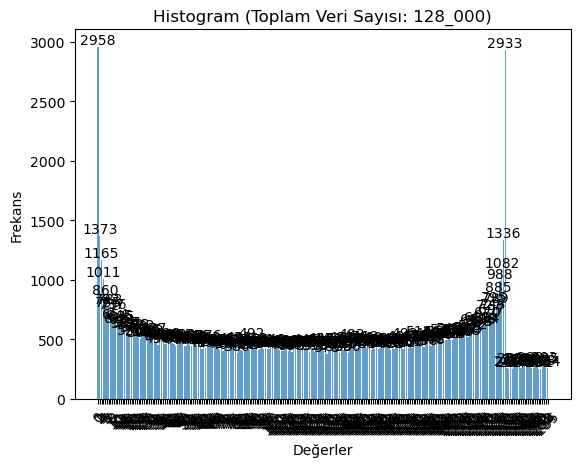

Ki-kare değeri: 35712.05999999997


In [58]:
mod = ki_kare_test_and_hist(mod_values, k_min = 0, k_max = 255, step = 1)
print(f"Ki-kare değeri: {mod}")

##### 2. Fraction Fonksiyonu

In [59]:
# Kesirli kısmı hesaplama fonksiyonu
def fractional_part(x):
    return x - np.floor(x)  # 3.14 - 3 = 0.14

# Çıkan değerin ilk basamağının elde edilmesi
frac_values = np.zeros(n_iterations)

for i in range(1, n_iterations + 1):
    fractional = fractional_part(key_values[i-1])
    frac_values[i-1] = int(fractional * 100) % n

In [60]:
# Elde edilen değerlerin txt dosyasına yazdırılması
with open("Output/Mod_256_128_000/Frac_Values.txt", "w") as file:
    for item in frac_values:
        file.write(f"{int(item)}\n") 

#### Fraction --- Gözlemlenen ve Beklenen Değerlerin Frekansları

In [61]:
# Mevcut bekelenen 256.000 elemanlı dizi
expected = [n_iterations/n] * n

# Gözlenen frekansları hesapla (0'dan 9'a kadar olan sayılar için)
observed = [np.sum(frac_values == i) for i in range(n)]
print (f"Gözlemlenen frekanslar (observed): {observed}")

Gözlemlenen frekanslar (observed): [8421, 3406, 2611, 2261, 1937, 1811, 1649, 1550, 1433, 1381, 1305, 1329, 1248, 1176, 1211, 1166, 1075, 1058, 1065, 1041, 988, 1014, 988, 948, 926, 938, 872, 908, 925, 839, 859, 903, 844, 867, 855, 887, 826, 810, 851, 816, 866, 854, 809, 865, 784, 836, 790, 821, 814, 852, 826, 857, 808, 811, 791, 801, 814, 799, 820, 864, 860, 824, 813, 852, 786, 870, 885, 858, 862, 892, 895, 904, 885, 920, 913, 944, 952, 958, 958, 994, 983, 1089, 1058, 1063, 1115, 1148, 1203, 1210, 1262, 1329, 1428, 1443, 1479, 1669, 1759, 1975, 2310, 2580, 3386, 8206, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

##### Fraction --- p_value Değerinin Değerinin Hesaplanması

In [62]:
chi2_stat = calculate_chi2_stat(observed, expected)
calculate_p_value(chi2_stat, df)

0.0

##### Fraction --- Ki-Kare Testi ve Histogramın Çizilmesi

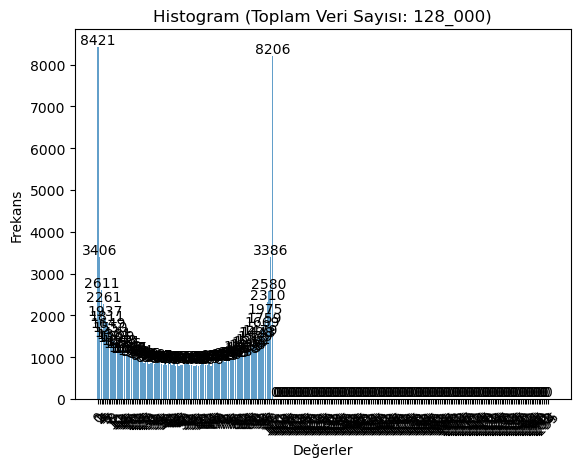

Ki-kare değeri: 451931.9959999999


In [63]:
frac = ki_kare_test_and_hist(frac_values, k_min = 0, k_max = 255, step = 1)
print(f"Ki-kare değeri: {frac}")

##### 3. Threshold Fonksiyonu

In [64]:
threshold = 0.5

threshold_values = np.zeros(n_iterations) 

for i in range(1, n_iterations):

    # Sayının tamamından - Tam kısmı çıkarılır  
    threshold_values[i-1] = key_values[i-1] - np.floor(key_values[i-1])   
   
    if threshold_values[i-1] < threshold:
        threshold_values[i-1] = 0

    else:
        threshold_values[i-1] = n-1

In [65]:
# Elde edilen değerlerin txt dosyasına yazdırılması
with open("Output/Mod_256_128_000/Threshold_Values.txt", "w") as file:
    for item in threshold_values:
        file.write(f"{int(item)}\n") 

#### Threshold --- Gözlemlenen ve Beklenen Değerlerin Frekansları

In [66]:
# Mevcut bekelenen 256.000 elemanlı dizi
expected = [n_iterations/2] + [0] * (n-2) + [n_iterations/2]

# Gözlenen frekansları hesapla (0'dan 9'a kadar olan sayılar için)
observed = [np.sum(threshold_values == i) for i in range(n)]
print (f"Gözlemlenen frekanslar (observed): {observed}")

Gözlemlenen frekanslar (observed): [64289, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 63711]


##### Threshold --- p_value Değerinin Değerinin Hesaplanması

In [67]:
# Burada sıfıra bölme hatasıyla karşılşamamak için epsilon=1e-10 şeklinde çok küçük bir hassiyet değeri calculate_chi2_stat(observed, expected) fonksiyonuna eklenmiştir.
chi2_stat = calculate_chi2_stat(observed, expected)
calculate_p_value(chi2_stat, df)

1.0

##### Threshold --- Ki-Kare Testi ve Histogramın Çizilmesi

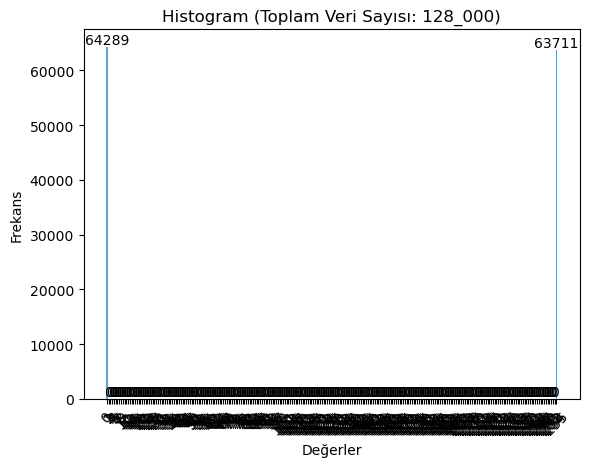

Ki-kare değeri: 16256334.084


In [68]:
threshold = ki_kare_test_and_hist(threshold_values, k_min = 0, k_max = 255, step = 1)
print(f"Ki-kare değeri: {threshold}")

##### 4. Sin Fonksiyonu

In [69]:
# Dizinin oluşturulması
sin_values = np.zeros(n_iterations)

for i in range(1, n_iterations + 1):
    sin_values[i-1] = int((np.sin(2 * np.pi * key_values[i-1]) + 1) * 50) % n

In [70]:
# Elde edilen değerlerin txt dosyasına yazdırılması
with open("Output/Mod_256_128_000/Sin_Values.txt", "w") as file:
    for item in sin_values:
        file.write(f"{int(item)}\n")

In [71]:
# Mevcut bekelenen 256.000 elemanlı dizi
expected = [n_iterations/n] * n

# Gözlenen frekansları hesapla (0'dan 15'a kadar olan sayılar için)
observed = [np.sum(sin_values == i) for i in range(n)]
print (f"Gözlemlenen frekanslar (observed): {observed}")

Gözlemlenen frekanslar (observed): [5920, 2521, 1856, 1710, 1465, 1371, 1243, 1170, 1124, 1074, 1001, 1042, 926, 962, 913, 936, 846, 910, 890, 888, 859, 926, 841, 840, 844, 829, 841, 827, 810, 858, 854, 837, 884, 860, 896, 883, 938, 969, 1015, 1021, 1038, 1052, 1111, 1162, 1262, 1379, 1506, 1701, 2148, 4952, 5030, 2205, 1801, 1474, 1430, 1226, 1188, 1126, 1050, 1060, 965, 982, 978, 910, 933, 877, 871, 895, 891, 888, 840, 835, 839, 852, 810, 832, 881, 823, 900, 851, 855, 870, 909, 979, 883, 962, 960, 932, 1008, 1111, 1130, 1157, 1174, 1251, 1308, 1509, 1656, 1897, 2571, 5924, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

##### Sin --- p_value Değerinin Değerinin Hesaplanması

In [72]:
chi2_stat = calculate_chi2_stat(observed, expected)
calculate_p_value(chi2_stat, df)

0.0

##### Sin --- Ki-Kare Testi ve Histogramın Çizilmesi

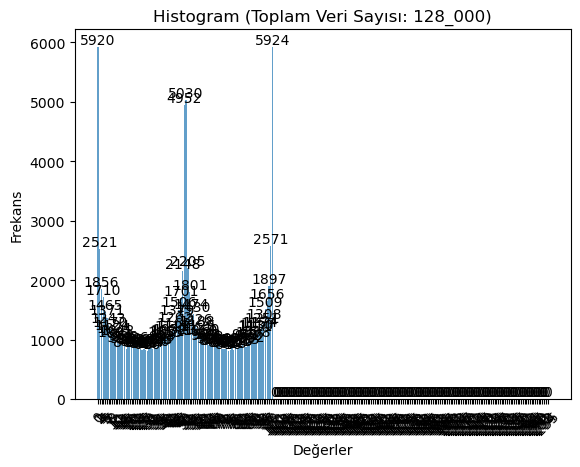

Ki-kare değeri: 372563.86000000004


In [73]:
sin = ki_kare_test_and_hist(sin_values, k_min = 0, k_max = 255, step = 1)
print(f"Ki-kare değeri: {sin}")

##### 5. Lineer Fonksiyon

In [74]:
# Başlangıç değerlerinin verilmesi
a = 1.5
b = -0.5

In [75]:
# Dizinin oluşturulması
lts_values = np.zeros(n_iterations)
for i in range(1, n_iterations + 1):
    lts_values[i-1] = (np.floor((a * key_values[i-1] + b) * 100)) % n

In [76]:
# Elde edilen değerlerin txt dosyasına yazdırılması
with open("Output/Mod_256_128_000/Lineer_Values.txt", "w") as file:
    for item in lts_values:
        file.write(f"{int(item)}\n")

In [77]:
# Mevcut bekelenen 256.000 elemanlı dizi
expected = [n_iterations/n] * n

# Gözlenen frekansları hesapla (0'dan 15'a kadar olan sayılar için)
observed = [np.sum(lts_values == i) for i in range(n)]
print (f"Gözlemlenen frekanslar (observed): {observed}")

Gözlemlenen frekanslar (observed): [565, 575, 582, 585, 516, 583, 537, 573, 564, 530, 597, 568, 555, 526, 572, 576, 531, 537, 552, 531, 529, 551, 578, 524, 564, 567, 556, 560, 540, 537, 542, 523, 544, 525, 521, 543, 549, 547, 549, 588, 582, 555, 547, 560, 532, 573, 546, 537, 573, 605, 563, 575, 586, 576, 592, 583, 598, 618, 582, 600, 623, 620, 588, 649, 611, 638, 661, 623, 652, 677, 651, 692, 729, 720, 691, 710, 734, 766, 763, 771, 814, 828, 838, 883, 870, 962, 923, 986, 990, 1048, 1110, 1158, 1247, 1329, 1513, 1629, 1748, 2151, 2715, 6726, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6847, 2840, 2140, 1795, 1606, 1471, 1294, 1272, 1182, 1133, 1032, 1034, 927, 969, 918, 863, 865, 906, 833, 812, 779, 813, 821, 743, 736

##### Lineer --- p_value Değerinin Değerinin Hesaplanması

In [78]:
chi2_stat = calculate_chi2_stat(observed, expected)
calculate_p_value(chi2_stat, df)

0.0

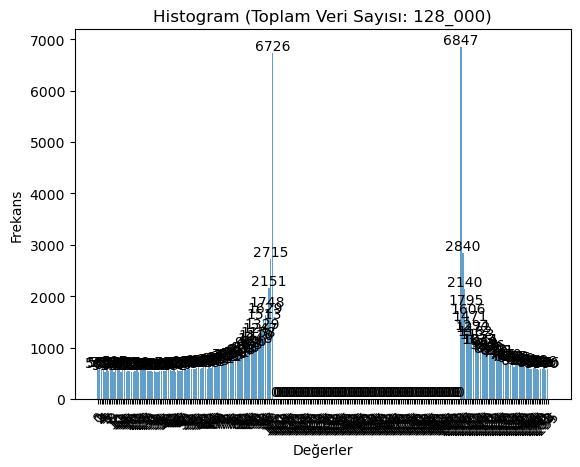

Ki-kare değeri: 277129.30400000006


In [79]:
lts = ki_kare_test_and_hist(lts_values, k_min = 0, k_max = 255, step = 1)
print(f"Ki-kare değeri: {lts}")